# Data Cleaning Challenge

## [Handling missing values](https://www.kaggle.com/code/rtatman/data-cleaning-challenge-handling-missing-values/notebook)

In [21]:
# modules we'll use
import pandas as pd
import numpy as np

# read in all our data
sf_permits = pd.read_csv("input/Building_Permits.csv")

# set seed for reproducibility
np.random.seed(0) 


/var/folders/5z/mtl704h97qgb0rjsjlpzwlc40000gn/T/ipykernel_14220/2700973886.py:6: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_permits = pd.read_csv("input/Building_Permits.csv")


In [4]:
# Look at a couple of rows from the sf_permits. There are many missing data

sf_permits.sample(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
78651,201503120624,8,otc alterations permit,03/12/2015,4273,029,2986,NaN,26th,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,9.0,Mission,94110.0,"(37.74972976527956, -122.40963202424835)",1374057173006
177779,201707071220,8,otc alterations permit,07/07/2017,0453,004A,950,NaN,Bay,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,2.0,Russian Hill,94109.0,"(37.80472551510833, -122.42280760820965)",1469546420378
64978,M529127,8,otc alterations permit,10/21/2014,0478,011,1290,NaN,Chestnut,St,...,NaN,NaN,NaN,NaN,NaN,2.0,Russian Hill,94109.0,"(37.80244997614665, -122.42443255018165)",1359656465959
165958,201704073507,8,otc alterations permit,04/07/2017,6507,003A,1134,NaN,Noe,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,8.0,Noe Valley,94114.0,"(37.750866393629146, -122.43209633372915)",1458922436280
147902,201701237639,8,otc alterations permit,01/23/2017,0623,001,1755,NaN,Van Ness,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,2.0,Pacific Heights,94109.0,"(37.791925784456105, -122.42306858292103)",1450933235988


In [10]:
# get the number of missing data points per column in sf_permits
missing_values_count = sf_permits.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

# Total missing values in the sf_permits dataset
total_cells = np.product(sf_permits.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

26.26002315058403

In [15]:
# look at the # of missing points in the first ten columns
missing_values_count

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

Values in `Street Number Suffix` are missing because they don't exist while values missing in `Zipcode` are not recorded.

In [16]:
# Your turn! Try removing all the rows from the sf_permits dataset that contain missing values. How many are left?
columns_with_na_dropped = sf_permits.dropna(axis=1)
columns_with_na_dropped.head()
print("Columns in original dataset: %d \n" % sf_permits.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 43 

Columns with na's dropped: 12


In [19]:
# Now try removing all the columns with empty values. Now how much of your data is left?
nan_value = float("NaN")
sf_permits.replace("", nan_value, inplace=True)
empty_columns_dropped = sf_permits.dropna(axis=1)
empty_columns_dropped.head()
print("Columns in original dataset: %d \n" % sf_permits.shape[1])
print("Columns with na's dropped: %d" % empty_columns_dropped.shape[1])

Columns in original dataset: 43 

Columns with na's dropped: 12


In [20]:
# Your turn! Try replacing all the NaN's in the sf_permits data with the one that
# comes directly after it and then replacing any remaining NaN's with 0
sf_permits.fillna(method = 'bfill', axis=0).fillna(0)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,A,Ellis,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,A,Geary,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,A,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,Y,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,A,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,A,Market,St,...,3.0,constr type 3,1.0,constr type 1,Y,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,0,Montgomery,St,...,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,0,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,0,Indiana,St,...,0.0,0,0.0,0,0,0.0,0,0.0,0,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,0,Sutter,St,...,0.0,0,0.0,0,0,0.0,0,0.0,0,1489608233656


Text(0.5, 1.0, 'Scaled data')

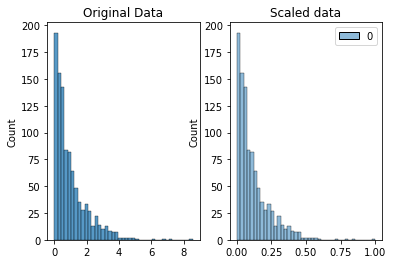

Text(0.5, 1.0, 'Normalized data')

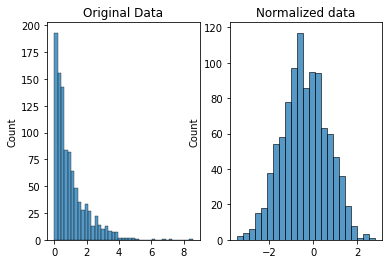


## [Parsing dates](https://www.kaggle.com/rtatman/data-cleaning-challenge-parsing-dates/)


## [Character encodings](https://www.kaggle.com/rtatman/data-cleaning-challenge-character-encodings/)


## [Inconsistent Data Entry](https://www.kaggle.com/rtatman/data-cleaning-challenge-inconsistent-data-entry/)